# Setting up businesses database and filtering by the review count

In [15]:
# import pandas as pd
# import numpy as np
# import os
# import json
# import matplotlib.pyplot as plt

# import tensorflow as tf
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split

# from sklearn import metrics

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import ModelCheckpoint

# bussinesses = pd.read_json('yelp_academic_dataset_business.json', lines=True)

# bus_filtered = bussinesses[bussinesses['review_count'] > 20]    #remove restuarants that have less than 20 reviews
# bus_filtered = bus_filtered.sample(n=10000, random_state=42)  #reduce to 10k
# bus_filtered = bus_filtered[['business_id', 'name', 'stars', 'review_count']]



#Setting up review database and filtering it based on the filtered bussinesses


In [ ]:

# reviews = pd.read_json('yelp_academic_dataset_review.json', lines=True)

# rev_filtered = reviews[reviews['business_id'].isin(bus_filtered['business_id'])]


# rev_filtered = rev_filtered[['review_id', 'business_id', 'text']]

# #save both results to new json files
# rev_filtered.to_json('filtered_reviews.json', orient='records', lines=True)
# bus_filtered.to_json("filtered_businesses.json", orient="records", lines=True)


# Load the json files

In [4]:
rev_filtered = pd.read_json('filtered_reviews.json', lines=True)
bus_filtered = pd.read_json('filtered_businesses.json', lines=True)

# Group the review text with its corresponding business


In [5]:

#Grouping the business_id with all the review text that corresponds to that business
grouped_reviews = rev_filtered.groupby('business_id')['text'].apply(' '.join).reset_index()
grouped_reviews


,business_id,text
0,--eBbs3HpZYIym5pEw8Qdw,We stayed here for two nights a couple of week...
1,--epgcb7xHGuJ-4PUeSLAw,Love their asiago roll. That and a cup of coff...
2,-0E7laYjwZxEAQPhFJXxow,I recently visited this dealership because the...
3,-0jzoPt3UeXn6FUXVQvyPg,Went to the movies downtown and decided to gra...
4,-12_gQ7NRcMWSRs97mRQdw,If I could give negative stars or even 0 stars...
...,...,...
9995,zy-BlEF0mkvAwOk3ru1WLA,Definitely the poorest of the approximately 6 ...
9996,zyRXfBnoE1JZVN4SE7OaaA,DON'T GO HERE. It's a shittier Hot Topic. In ...
9997,zy_g2wKTNIB7EQdG73_Xaw,Einstein medical center in North Philadelphia ...
9998,zzXDi0Pdv0s84M-oQaIa_g,Radnor Lake is yet another serenely beautiful ...


# Calculate TF-IDF

In [6]:
#Possibly create our own vocabulary

vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.9, min_df = 0.01)
tfidf_matrix = vectorizer.fit_transform(grouped_reviews['text'])
tfidf_feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_feature_names)

#tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=grouped_reviews['business_id'], columns=tfidf.get_feature_names_out())

tfidf_df

,00,000,00am,00pm,01,02,03,04,05,06,...,zero,zest,zesty,zing,zip,ziti,zombie,zone,zoo,zucchini
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.015180,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.000000,0.050156,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.002678,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.006402,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.009927,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
9996,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
9997,0.005809,0.011221,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.014986,0.0
9998,0.001647,0.003181,0.0,0.0,0.0,0.0,0.0,0.0,0.004059,0.0,...,0.001968,0.0,0.0,0.0,0.0,0.0,0.002497,0.0,0.000000,0.0


# Filter Top 10,000 words based on TF-IDF score

In [7]:
avg_tfidf_scores = tfidf_df.mean(axis=0)   #get average scores

sorted_tfidf = avg_tfidf_scores.sort_values(ascending=False)    #sort
top_10000_words = sorted_tfidf.head(10000).index
top_tfidf_df = tfidf_df[top_10000_words]
top_tfidf_df['business_id'] = grouped_reviews['business_id']
top_tfidf_df

C:\Users\Illya\AppData\Local\Temp\ipykernel_13604\1719654688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_tfidf_df['business_id'] = grouped_reviews['business_id']


,food,pizza,chicken,order,ordered,restaurant,delicious,bar,menu,cheese,...,plexiglass,scores,woody,presume,25th,coordinated,savvy,modified,thriving,business_id
0,0.021416,0.000000,0.000000,0.006656,0.007348,0.000000,0.000000,0.027894,0.008245,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,--eBbs3HpZYIym5pEw8Qdw
1,0.134929,0.000000,0.007200,0.087511,0.096616,0.006862,0.052575,0.022923,0.020327,0.094232,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,--epgcb7xHGuJ-4PUeSLAw
2,0.000000,0.000000,0.000000,0.006237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0E7laYjwZxEAQPhFJXxow
3,0.244208,0.033195,0.058416,0.028943,0.110773,0.164604,0.129831,0.045824,0.114733,0.069043,...,0.0,0.0,0.008731,0.0,0.0,0.0,0.0,0.0,0.0,-0jzoPt3UeXn6FUXVQvyPg
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.007507,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-12_gQ7NRcMWSRs97mRQdw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.145835,0.000000,0.042111,0.015996,0.097131,0.050169,0.076880,0.011173,0.059447,0.095397,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,zy-BlEF0mkvAwOk3ru1WLA
9996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,zyRXfBnoE1JZVN4SE7OaaA
9997,0.017960,0.000000,0.000000,0.004186,0.000000,0.000000,0.000000,0.011696,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,zy_g2wKTNIB7EQdG73_Xaw
9998,0.006363,0.000000,0.000000,0.001780,0.000000,0.000744,0.000713,0.002486,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,zzXDi0Pdv0s84M-oQaIa_g


# Add the columns to the merged data frame

In [9]:
text_df = grouped_reviews[['business_id', 'text']]
#grouped_reviews.drop('text', axis=1, inplace=True)
merged_df = pd.merge(bus_filtered, rev_filtered, on='business_id')
merged_df.drop('review_id', axis=1, inplace=True)
merged_df.drop('text', axis=1, inplace=True)
merged_df = merged_df.drop_duplicates(subset='business_id', keep='first')

merged_df = pd.merge(merged_df, top_tfidf_df, on='business_id')

In [10]:
merged_df = merged_df.sort_values('business_id')
merged_df

,business_id,name,stars_x,review_count,food,pizza,chicken,order,ordered,restaurant,...,figs,plexiglass,scores,woody,presume,25th,coordinated,savvy,modified,thriving
9378,--eBbs3HpZYIym5pEw8Qdw,Holiday Inn Express & Suites Tampa-Fairgrounds...,2.5,24,0.021416,0.000000,0.000000,0.006656,0.007348,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
611,--epgcb7xHGuJ-4PUeSLAw,Manhattan Bagel,3.0,34,0.134929,0.000000,0.007200,0.087511,0.096616,0.006862,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3091,-0E7laYjwZxEAQPhFJXxow,AutoNation Cadillac Port Richey,3.5,25,0.000000,0.000000,0.000000,0.006237,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6034,-0jzoPt3UeXn6FUXVQvyPg,Trillium,4.5,154,0.244208,0.033195,0.058416,0.028943,0.110773,0.164604,...,0.0,0.0,0.0,0.008731,0.0,0.0,0.0,0.0,0.0,0.0
9360,-12_gQ7NRcMWSRs97mRQdw,Days Inn by Wyndham Gretna New Orleans,1.5,28,0.000000,0.000000,0.000000,0.000000,0.000000,0.007507,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451,zy-BlEF0mkvAwOk3ru1WLA,BubbaQue's,3.5,22,0.145835,0.000000,0.042111,0.015996,0.097131,0.050169,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2324,zyRXfBnoE1JZVN4SE7OaaA,Kulture Vulture,3.0,51,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5605,zy_g2wKTNIB7EQdG73_Xaw,Einstein Medical Center Philadelphia,2.0,44,0.017960,0.000000,0.000000,0.004186,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1816,zzXDi0Pdv0s84M-oQaIa_g,Radnor Lake State Park,4.5,205,0.006363,0.000000,0.000000,0.001780,0.000000,0.000744,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
text_df

,business_id,text
0,--eBbs3HpZYIym5pEw8Qdw,We stayed here for two nights a couple of week...
1,--epgcb7xHGuJ-4PUeSLAw,Love their asiago roll. That and a cup of coff...
2,-0E7laYjwZxEAQPhFJXxow,I recently visited this dealership because the...
3,-0jzoPt3UeXn6FUXVQvyPg,Went to the movies downtown and decided to gra...
4,-12_gQ7NRcMWSRs97mRQdw,If I could give negative stars or even 0 stars...
...,...,...
9995,zy-BlEF0mkvAwOk3ru1WLA,Definitely the poorest of the approximately 6 ...
9996,zyRXfBnoE1JZVN4SE7OaaA,DON'T GO HERE. It's a shittier Hot Topic. In ...
9997,zy_g2wKTNIB7EQdG73_Xaw,Einstein medical center in North Philadelphia ...
9998,zzXDi0Pdv0s84M-oQaIa_g,Radnor Lake is yet another serenely beautiful ...


Done datasets!!

# Methods Library

In [12]:
from collections.abc import Sequence

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)

def drop_two_columns(df, column1 = 'business_id', column2 = 'name'):
    df.drop(column1, axis=1, inplace=True)
    df.drop(column2, axis=1, inplace=True)
    return df

### Split train/test data && Create Model





In [13]:
#menage data frame to create better model
names = merged_df['name']
df = drop_two_columns(merged_df)
missing_median(df, 'stars_x')
missing_median(df, 'review_count')

encode_numeric_zscore(df, 'review_count')

In [37]:
x,y = to_xy(df, "stars_x")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25, random_state=45)

for i in range(5):
    model = Sequential()
    input_size = x_train.shape[1]

    #Input layer
    model.add(Dense(64, input_dim=input_size, activation='relu'))
    model.add(Dense(32, activation='relu'))
    #Output layer
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')
    checkpointer = ModelCheckpoint(filepath="dnn/relu64adam4.keras", verbose=0, save_best_only=True) # save best model

    model.fit(x_train, y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

model.load_weights('dnn/relu64adam4.keras') # load weights from best

## Important!! change the file name every time we test with different hyperparameters

Epoch 1/1000


c:\Users\Illya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 - 1s - 5ms/step - loss: 2.1040 - val_loss: 0.3356
Epoch 2/1000
235/235 - 0s - 2ms/step - loss: 0.1929 - val_loss: 0.1555
Epoch 3/1000
235/235 - 0s - 2ms/step - loss: 0.0889 - val_loss: 0.1329
Epoch 4/1000
235/235 - 0s - 2ms/step - loss: 0.0583 - val_loss: 0.1278
Epoch 5/1000
235/235 - 0s - 2ms/step - loss: 0.0434 - val_loss: 0.1350
Epoch 6/1000
235/235 - 0s - 2ms/step - loss: 0.0340 - val_loss: 0.1327
Epoch 7/1000
235/235 - 0s - 2ms/step - loss: 0.0270 - val_loss: 0.1368
Epoch 8/1000
235/235 - 0s - 2ms/step - loss: 0.0218 - val_loss: 0.1428
Epoch 9/1000
235/235 - 0s - 2ms/step - loss: 0.0193 - val_loss: 0.1468
Epoch 9: early stopping
Epoch 1/1000
235/235 - 1s - 5ms/step - loss: 1.6160 - val_loss: 0.2255
Epoch 2/1000
235/235 - 0s - 2ms/step - loss: 0.1405 - val_loss: 0.1448
Epoch 3/1000
235/235 - 0s - 2ms/step - loss: 0.0784 - val_loss: 0.1323
Epoch 4/1000
235/235 - 0s - 2ms/step - loss: 0.0547 - val_loss: 0.1297
Epoch 5/1000
235/235 - 0s - 2ms/step - loss: 0.0406 - val_loss: 0.

In [38]:
# Predict and measure RMSE
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Score (RMSE): 0.36065247654914856


In [31]:
# print out prediction
df_y = pd.DataFrame(y_test, columns=['ground_truth'])
df_pred = pd.DataFrame(pred, columns=['predicted'])
result = pd.concat([df_y, df_pred],axis=1)
result

,ground_truth,predicted
0,4.0,3.676150
1,5.0,4.516366
2,4.5,3.926168
3,4.0,4.098470
4,3.0,3.402062
...,...,...
2495,4.5,4.334270
2496,4.0,4.479225
2497,2.5,2.794617
2498,4.5,4.234043


# Visualizing (Regression Models)

In [32]:
#Imports and Methods
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

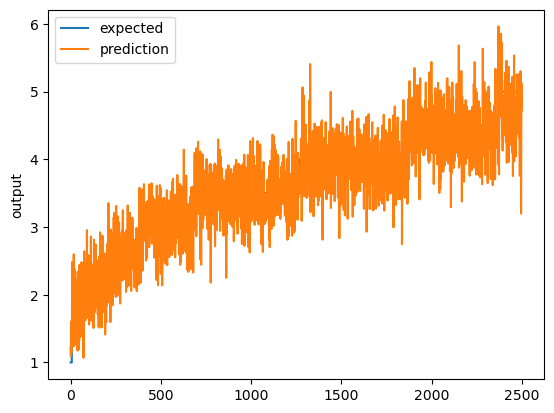

In [33]:
# Plot the chart
chart_regression(pred.flatten(),y_test, sort=True)

# Prediction with 5 businesses

In [34]:
# Sample predictions
for i in range(5):
    print("{}. Business Name: {}, Stars: {}, predicted Stars: {}".format(i+1,names[i],y_test[i],pred[i]))

1. Business Name: Aquarium Restaurant, Stars: 4.0, predicted Stars: [3.6761498]
2. Business Name: Li-En Nails & Spa, Stars: 5.0, predicted Stars: [4.5163665]
3. Business Name: A Very Important Pet, Stars: 4.5, predicted Stars: [3.926168]
4. Business Name: Roxborough Seafood House, Stars: 4.0, predicted Stars: [4.0984697]
5. Business Name: Camp Bow Wow Lawrence, Stars: 3.0, predicted Stars: [3.4020617]
